### 3\. Correlation

Starting with the dataframe in our pandas tutorial make a scatterplot of temperature (x axis) vs. dew point (y axis) for weater_mar2012. Assume an accuracy of 0.2 K in both temperature and dewpoint and use a212libs.linfit to add a regression line with error bars to the scatter plot.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
url_template = ("http://climate.weather.gc.ca/climateData/bulkdata_e.html?"
                "format=csv&stationID=5415&Year={year}&Month={month}"
                "&timeframe=1&submit=Download+Data")

To get the data for March 2012, we need to format it with `month=3, year=2012`.

In [3]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url,skiprows=15,index_col='Date/Time',
                   parse_dates=True,encoding='latin1')

[<matplotlib.text.Text at 0x1045117f0>, <matplotlib.text.Text at 0x113fc00f0>]

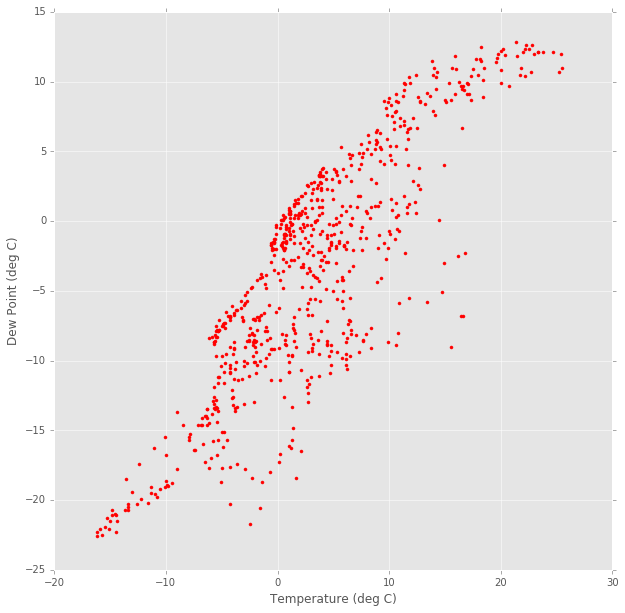

In [4]:
weather_mar2012.columns = [col.replace('Â°', '') for col in weather_mar2012.columns]
weather_mar2012.columns
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot('Temp (C)','Dew Point Temp (C)','r.',data = weather_mar2012)
ax.set(xlabel = 'Temperature (deg C)', ylabel = 'Dew Point (deg C)')

In [5]:
from a212libs.linfit import LineFitWt
temps = weather_mar2012['Temp (C)'].values
dewpts = weather_mar2012['Dew Point Temp (C)'].values
dx = np.ones_like(temps)*0.2
dy = dx

In [6]:
slope_w,yint_w, var_slope, var_inter = LineFitWt(temps,dewpts,dy)

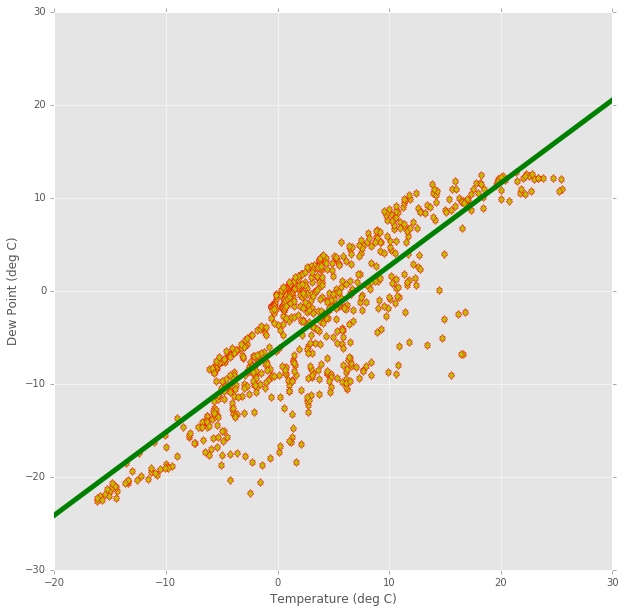

In [7]:
out=ax.errorbar(temps,dewpts,yerr=dy,
                fmt='bo',ecolor='r',marker='d',mec='r',mfc='y',ms=6,zorder=10,
               label='data')
plot_temps = np.array([-20,30])
yvals = yint_w + slope_w*plot_temps
ax.plot(plot_temps,yvals,'g-',lw=5,label = 'weights',zorder=20)
display(fig)